## What is Deep Learning?

Think of deep learning as a method that allows computers to learn from data, just like we humans do. Imagine this: when you see sales numbers, stock prices, or customer trends over time, your brain naturally spots patterns. Maybe you notice that sales spike every December or that the stock market drops after certain news events.

Deep learning does something similar — but faster and on a much bigger scale. It uses a tool called a Neural Network, which mimics the way our brain processes information. This is why deep learning has become a game-changer for predicting things like sales, stock prices, and customer behaviors.

## Why Should Business Students Care?
As business students, you’re going to face decisions based on uncertain futures:

- Should we stock up on a product?
- Is the market going up or down?
- Will this customer stay or leave?

Deep learning helps you make smarter decisions by learning from historical data. For example:

- Predicting stock prices using past trends.
- Forecasting sales based on historical demand.
- Understanding customer behavior to prevent churn.

## What is LSTM?
Now, here’s where a tool called LSTM (Long Short-Term Memory) comes in. LSTM is a special kind of deep learning model designed specifically for time-based data — things that change over time, like stock prices or monthly sales.


- Imagine you’re watching a TV series. Each episode builds on the previous ones, and you need to remember key details from earlier episodes to understand the story today.
- LSTM does the same thing with data. It looks at past data points, remembers the important details, and uses them to predict what happens next.

## How Does It Work?
Now, I know you’re probably wondering: How does LSTM actually do this? Here’s the simple explanation:

LSTM works by using something called gates to decide:

- Forget Gate: Decides what information from the previous memory state should be discarded.
- Input Gate: Determines what new information to add to the memory cell.
- Output Gate: Decides what information to output at the current time step.
- Memory Cell: Combines the old memory (weighted by the forget gate) and the new information (weighted by the input gate) to update the cell state.

## Real-World Applications of LSTM in FinTech
1. Stock Market Prediction

- Example: Imagine you’re trying to predict Tesla’s stock price tomorrow.
- LSTM can analyze the past 10 or 20 days of stock prices, learn the trends, and predict tomorrow’s price.
- This is extremely useful for traders and investors who want to make informed decisions.

2. Credit Risk Assessment
- Example: When banks or lending platforms evaluate whether to give someone a loan, they analyze that person’s financial history over time.
- LSTM can look at past loan payments, spending patterns, and credit scores to predict if a customer is likely to default on a loan.
- This helps FinTech companies offer loans while managing risk.

3. Fraud Detection
- Example: Let’s say a customer usually spends  `$`50 a week on their credit card, and suddenly there’s a  `$`10,000 charge.
- LSTM can analyze their past spending habits and identify that something doesn’t look right.
- Banks and payment companies use this to detect fraud and prevent unauthorized transactions.

## The Business Value of Deep Learning
So, why does this matter to you? Here’s the takeaway:

- Deep learning helps businesses predict the future with greater accuracy.
- It allows you to make data-driven decisions instead of relying on intuition alone.
- It helps businesses save money and reduce risks by automating complex data analysis.

## Step-by-Step Process
1. Collect the Data:
- We’ll download Tesla’s historical stock prices — specifically the ‘closing price’ — from Yahoo Finance.

2. Preprocess the Data:
- We’ll scale the data (normalize it) to make it easier for the model to learn.
- Then, we’ll create a dataset where we use the last 10 days of prices to predict the next day’s price.

3. Build the LSTM Model:
- LSTM is like a ‘smart memory box.’ It learns which past data is important and which is not.
- We’ll train the model to spot trends in Tesla’s price.

4. Make Predictions:
- Finally, we’ll test the model and see how well it can predict future prices using data it hasn’t seen before.

## Example Code Step by Step
Step 1: Import Libraries and Download Data


[*********************100%***********************]  1 of 1 completed


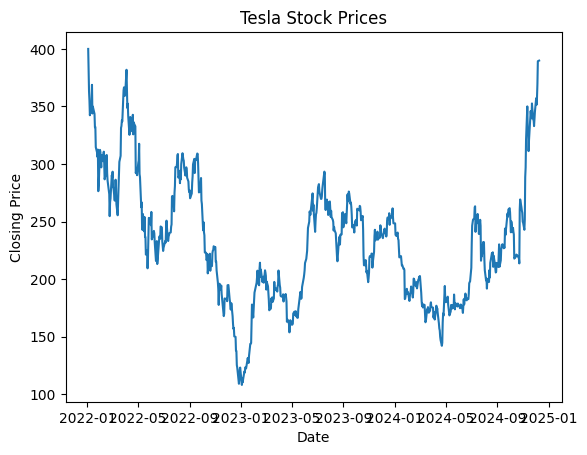

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Download stock data
data = yf.download('TSLA', start='2022-01-01', end='2024-12-10')
data = data[['Close']]
plt.plot(data)
plt.title('Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()



Step 2: Preprocess the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create time-step data
def create_dataset(data, time_step=10):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step, 0])
        Y.append(data[i+time_step, 0])
    return np.array(X), np.array(Y)

X, Y = create_dataset(scaled_data, time_step=10)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM


Step 3: Build and Train the LSTM Model

In [ ]:
%%capture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(10, 1))) # 第一層 LSTM
model.add(LSTM(50)) # 第二層 LSTM
model.add(Dense(1)) # 輸出層

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=50, batch_size=32, verbose=1)



Step 4: Make Predictions and Visualize Results


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


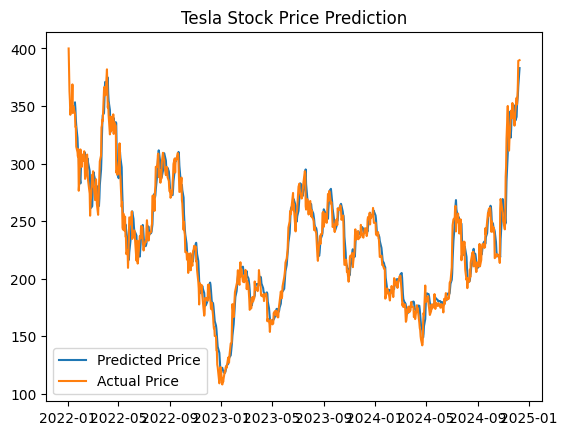

In [ ]:
# Predict the stock prices
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
# Scale back to original prices

# Visualize predictions
plt.plot(data.index[10:], predictions, label='Predicted Price')
plt.plot(data, label='Actual Price')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()


## **What’s Happening Here?**
- Training: The model looks at the last 10 days of stock prices and learns how they influence the next day’s price.
- Results: The predictions may not be perfect, but the model can often spot the general trends.

## **Note for you**
- LSTM is a powerful tool for predicting trends in time-based data like stock prices, sales, or economic indicators.
- While predictions won’t always be perfect — especially in volatile markets like stocks — LSTM gives businesses a valuable starting point for better planning and forecasting.



> 加入區塊引述符號


## LSTM vs Traditional Statistical Methods Comparison

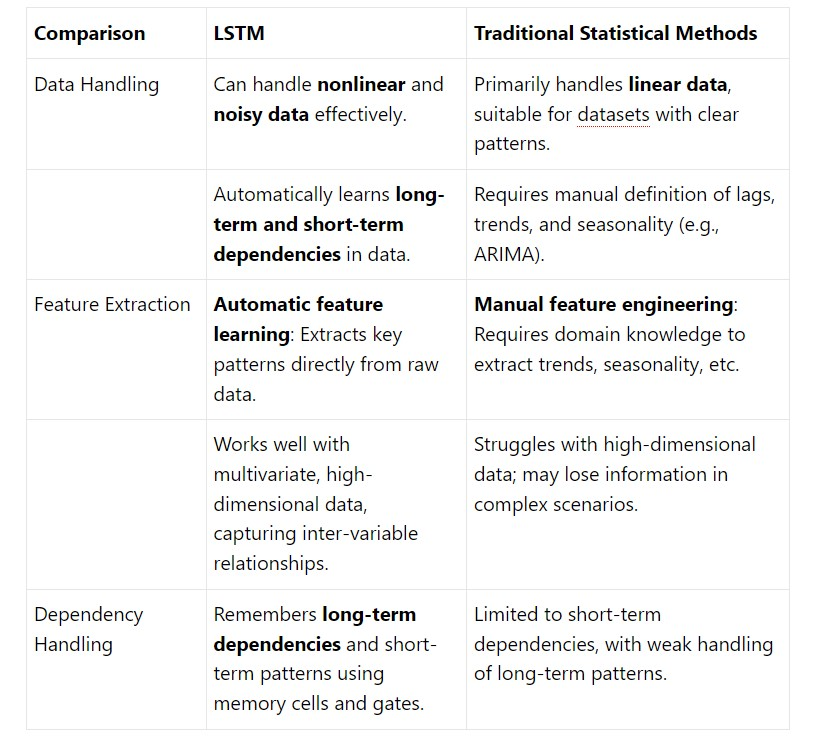


**Conclusion**
- LSTM is ideal for handling complex, nonlinear, and long-term dependent data, especially in large-scale scenarios, but it requires more data and computing resources.
- Traditional statistical methods are efficient for small-scale, linear, and structured data, with less computational cost but limited flexibility for handling complex or nonlinear patterns.